In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

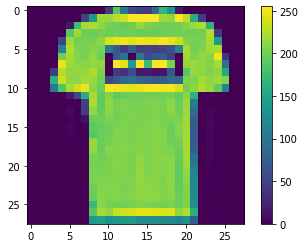

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
#plt.grid(False)
plt.show()

In [8]:
# so values are between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3). 'softmax' means output has to be between 0 to 1
    # output layer suppose to have as many as neurons as possible,
    # at here we use 10 because that is the number of classes (class_names.length == 10)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6301 - accuracy: 0.7807
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3833 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3402 - accuracy: 0.8743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3165 - accuracy: 0.8819
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9025
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3524 - accuracy: 0.8746
Test accuracy: 0.8745999932289124


In [13]:
predict = model.predict(test_images)

print(predict)

[[1.3054951e-06 2.5593645e-08 1.7251220e-09 ... 4.1096509e-03
  2.5571139e-09 9.9193877e-01]
 [7.3347487e-06 1.2703825e-13 9.9215925e-01 ... 1.1955179e-15
  3.9338501e-09 1.6880813e-14]
 [5.5928534e-10 1.0000000e+00 8.6714676e-15 ... 8.9641716e-26
  2.4513691e-11 1.8845643e-17]
 ...
 [9.6316144e-06 7.3278831e-12 1.6609124e-06 ... 4.2944476e-10
  9.9994767e-01 1.1987937e-11]
 [1.2555348e-08 9.9999797e-01 8.6733082e-10 ... 1.8791404e-17
  1.0029011e-08 4.4301837e-12]
 [1.8439110e-05 4.0049141e-08 6.0188148e-07 ... 2.7311277e-03
  5.9313312e-05 9.5748555e-06]]
